# NBA Trends Project

In this project, we will be analyzing data from the NBA (National Basketball Association) and exploring possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project, the set of data has been limited to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [89]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [9]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### With the data subset into two years, the data from 2010 will first be examined. 

Suppose we want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, we will focus on two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games will be.

In [14]:
knicks_pts = nba_2010.pts[nba_2010.fran_id == "Knicks"]
nets_pts = nba_2010.pts[nba_2010.fran_id == "Nets"]

Evaluating this data, we can examine the two teams' average point scored over the season to determine any association between the franchise and points scored columns of the data set.

In [65]:
diff_means_2010 = knicks_pts.mean() - nets_pts.mean()
print("The mean difference in total points over the course of the 2010 season between the Knicks and the Nets comes out to :")
print(diff_means_2010)

The mean difference in total points over the course of the 2010 season between the Knicks and the Nets comes out to :
9.731707317073173


Just the difference of means however may not paint a clear enough picture with the result of one number for us to be able to come to a conclusion on any type of association. 

It will then be useful look at the full distribution of values to understand whether a difference in means is meaningful, and we will do that by creating a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. 

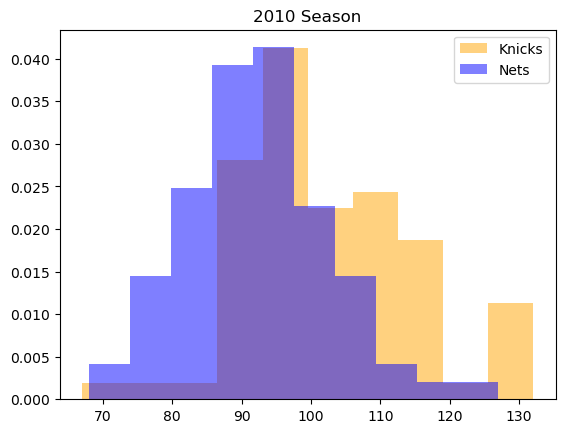

<Figure size 640x480 with 0 Axes>

In [56]:
plt.hist(knicks_pts, alpha = .5, color = "orange", label = "Knicks", density = True)
plt.hist(nets_pts, alpha= .5, color = "blue", label = "Nets",density = True)
plt.title("2010 Season")
plt.legend()
plt.show()

plt.clf()

With a fair amount of overlap in the center of the two distributions, the graph suggests to us along with the small difference in mean total points that there may not be a very strong association between the two variables examined.

To explore this relationship further, we will do the same analysis on the same two teams in the year 2014

The mean difference in total points over the course of the 2014 season between the Knicks and the Nets comes out to :
9.731707317073173
(We can note that this actually comes to the same number as the 2010 season)


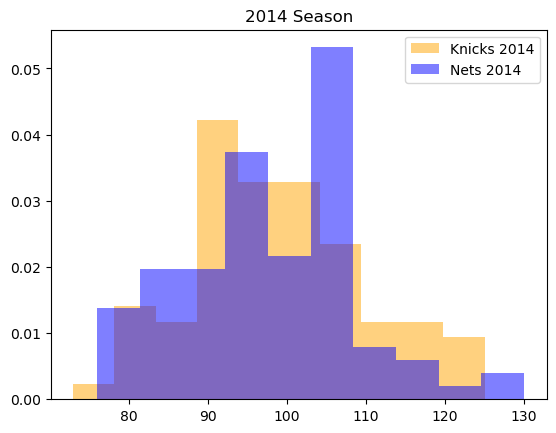

<Figure size 640x480 with 0 Axes>

In [66]:
knicks_pts_14 = nba_2014.pts[nba_2014.fran_id == "Knicks"]
nets_pts_14 = nba_2014.pts[nba_2014.fran_id == "Nets"]

diff_means_2014 = knicks_pts.mean() - nets_pts.mean()
print("The mean difference in total points over the course of the 2014 season between the Knicks and the Nets comes out to :")
print(diff_means_2014)
print("(We can note that this actually comes to the same number as the 2010 season)")

plt.hist(knicks_pts_14, alpha = .5, color = "orange", label = "Knicks 2014", density = True)
plt.hist(nets_pts_14, alpha= .5, color = "blue", label = "Nets 2014",density = True)
plt.title("2014 Season")
plt.legend()
plt.show()

plt.clf()

With the histogram of the 2014 season having more overlap then that of the 2010 season, we can note once again that there may not be any strong association between these two variables obverved.

Using 2010 season data, we can observe across more teams the relationship between a franchise and the amount of points they score per game. With the use of side by side box plots, the comparison across a larger sample size can be made to see if there is any assocaiton.

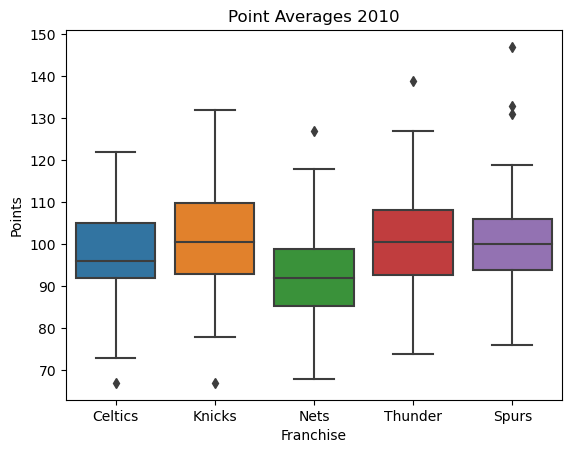

<Figure size 640x480 with 0 Axes>

In [58]:
sns.boxplot(data = nba_2010, x = "fran_id", y = "pts")
plt.xlabel("Franchise")
plt.ylabel("Points")
plt.title("Point Averages 2010")
plt.show()
plt.clf()

The boxplot returns the similar answer of no strong or meaningful relationship, due to the same amount of observed overlap between the plots for each individual team. 


### Next we will be obverving if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

We can use a contingency table of frequencies and subsequent analysis to determine if these categorical variables are associated.

In [68]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_)
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


In [69]:
location_result_proportions = location_result_freq / len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


Above we have calculated the actual frequencies of all the possible outcomes of game results compared against game locations, and have transformed those numbers into proportions.

Using the contingency table created above, we can calculate an expected contingency table (if there were no association) and the Chi-Square statistic (which compares the observed values to the expected values and can determine whether the difference between the observed and expected values is statistically significant)

In [78]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)

print("The expected value matrix when comparing game results against game locations:")
print(expected)

print('\n')

print("The chi score from this analysis results in:")
print(chi2)

The expected value matrix when comparing game results against game locations:
[[119. 119.]
 [106. 106.]]


The chi score from this analysis results in:
6.501704455367053


*For a 2x2 table, Chi-squared greater than about 4 indicates an association. We have exceeded that.*

### For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

To be able to visual observe this data, first we can plot the forecasted predictions against the actual point differentials on a scatter plot. Accompanying that graph, the `covariance and correlation (measures of the strength of a linear association between two quantitative variables)` between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset can be calculated.

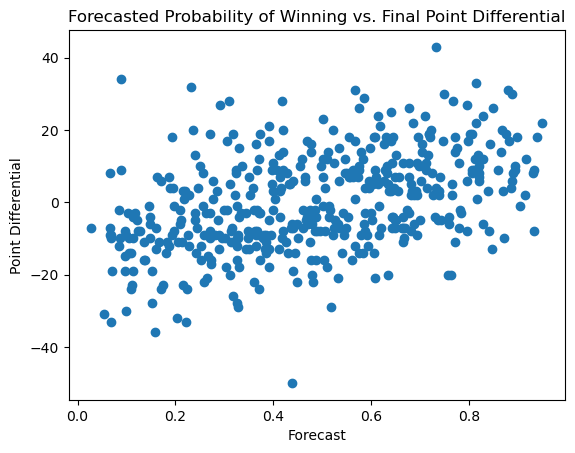

<Figure size 640x480 with 0 Axes>

In [85]:
plt.scatter(x=nba_2010.forecast, y= nba_2010.point_diff)
plt.xlabel("Forecast")
plt.ylabel("Point Differential")
plt.title("Forecasted Probability of Winning vs. Final Point Differential")
plt.show()
plt.clf()

The python library numpy will provide a matrix consisting of the variance of each individual statistic and the covariance of both statistics (from negative to positive infinity). It will also provide the statistic of correlation (from -1 to 1).

In [87]:
forecast_pointdiff_covmatrix = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(forecast_pointdiff_covmatrix)

print("Therefore our resulting covariance comes out to:")
forecast_pointdiff_covariance = 1.37
print(forecast_pointdiff_covariance)

[[  0.05   1.37]
 [  1.37 186.56]]
Therefore our resulting covariance comes out to :
1.37


In [88]:
print("And our resulting correlation comes out to:")
pointdiff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
pointdiff_forecast_corr

And our resulting correlation comes out to:


PearsonRResult(statistic=0.44020887084680815, pvalue=9.41039157313972e-23)

With results of covariance and correlation that land closer to 0 at 1.37 and .44 (respectively), we can conclude that our analysis says there are weak to no linear correlations between these two variables. 